In [2]:
# importing and path definition
import math
import sys
import faiss
import h5py
import csv
from functools import wraps
from time import time
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.manifold import TSNE
import umap

In [3]:
HERE = Path(_dh[-1])
HERE

PosixPath('/media/arma/DATA/Proje_3501/LIBRARY/CommerciallyAvailable/SELECTED')

In [7]:
umap_H17 = pd.read_csv("SPACE/H17_umap.csv", index_col=False)
umap_H17['group'] = '17'
umap_H17

,X,Y,Name,SMILES,group
0,10.795364,-4.090719,ZINCh50000000BTE,CC(C)C(N)CC(=O)N1CCOC(C(C)N)C1,17
1,13.221845,0.681794,ZINCh50000000CcA,CC(C)C(NC(N)=O)C(=O)NCC(C)S(C)=O,17
2,14.264892,-1.551181,ZINCh50000000Dtm,CC(C)C(CO)CNC(=O)C(N)C1CCOC1,17
3,12.824349,1.662657,ZINCh50000000Fe2,CC(C)c1n[nH]cc1C(=O)NCC(O)C(N)=O,17
4,11.889412,-3.446280,ZINCh50000000GbB,CC1(C(=O)N2CC(N)CC(O)C2)CC(C#N)C1,17
...,...,...,...,...,...
167383,10.137240,1.988854,ZINChE00000crehd,CCCCCCNCCc1ccccc1OC,17
167384,10.570786,3.576440,ZINChE00000eFjvZ,CC(CNC1CC2(CC2)C1)c1ccccc1F,17
167385,10.348623,3.260264,ZINChE000001dy15,CCC(CC)NC(=O)C(CC)c1ccccc1,17
167386,10.020148,2.254974,ZINChE000004wlnF,Cc1ccccc1COc1ccc(C#N)cc1,17


In [53]:
umap_H18 = pd.read_csv("SPACE//H18_umap.csv", index_col=False)
umap_H18['group'] = '18'
umap_H18

,X,Y,Name,SMILES,group
0,8.480396,2.277204,ZINCi5000000PBNE,CC(=O)NCC1CCN(C(=O)c2nnc(C)o2)C1,18
1,6.878916,0.713649,ZINCi5000000PCXR,CC(=O)NC1CCN(Cn2nc(C)n(C)c2=O)C1,18
2,6.557501,5.313702,ZINCi5000000PDjB,CC(=O)NC(CC1CCC1)C(=O)NC(C#N)CO,18
3,6.650324,5.635200,ZINCi5000000PEZR,CC(=O)C1CNC(C(=O)NCC(N)C(F)(F)F)C1,18
4,9.349970,0.348788,ZINCi5000000PFn4,CC(=O)C(C)(O)CN1CCC2(C1)OC(=O)NC2C,18
...,...,...,...,...,...
294970,2.993670,3.664463,ZINCiE00000eJquP,CCC(C)NC(=O)c1ccc(F)c(C(F)F)c1F,18
294971,2.038211,2.826443,ZINCiE000002ezWR,CCCC(=O)Nc1ccc(N2CCCCC2)cc1,18
294972,3.385375,1.807125,ZINCiE000002gaeZ,Cc1conc1CNC(c1ccccc1)C(C)C,18
294973,7.384628,0.533909,ZINCiE0000066NPZ,Cc1ccc2c(c1)OC(=O)CC2c1ccccc1,18


In [54]:
umap_H19 = pd.read_csv("SPACE//H19_umap.csv", index_col=False)
umap_H19['group'] = '19'
umap_H19

,X,Y,Name,SMILES,group
0,7.042059,-2.932411,ZINCj5000002736T,CC#CCC(NC(=O)CSCC(=O)OC)C(=O)OC,19
1,13.596644,-1.977641,ZINCj500000273aK,CC#CCC1NC(=O)N(CCS(=O)(=O)NCC)C1=O,19
2,9.292697,4.034873,ZINCj500000275NB,CC(=O)N1CCCC1C(=O)N=c1[nH][nH]cc1C(N)=O,19
3,10.376113,-4.523542,ZINCj5000002779T,CC(=O)N1CCC(OC(=O)C2C3CS(=O)(=O)CC32)C1,19
4,7.550621,-3.062742,ZINCj500000278nY,CC(=O)NCC(=O)NCC(=O)NC1(C#N)CCCC1,19
...,...,...,...,...,...
481345,9.527772,1.262598,ZINCjE00000e7710,Cc1sc2ccccc2c1CNC1CCNC(C)C1,19
481346,9.428757,-1.437533,ZINCjE00000eiMfy,CN(CC1CCCO1)C(=O)c1c(F)cc(Br)cc1Cl,19
481347,8.615841,-0.260116,ZINCjE000003Vqni,CCCCN(CCCC)C(=O)c1nccc(Cl)c1O,19
481348,9.268200,4.003730,ZINCjE000003YCQH,O=C(N=c1[nH][nH]cc1Br)c1cccc(C(F)(F)F)c1,19


In [55]:
umap_H20 = pd.read_csv("SPACE//H20_umap.csv", index_col=False)
umap_H20['group'] = '20'
umap_H20

,X,Y,Name,SMILES,group
0,7.097404,-1.010531,ZINCk5000003VAkS,CC(C)(CN)C(=O)NS(=O)(=O)c1ccc([N+](=O)[O-])nc1,20
1,11.725875,-0.148694,ZINCk5000003VBQ0,CC(C)(CNS(N)(=O)=O)NC(=O)c1n[nH]c2c1CCC2,20
2,11.352509,-4.168260,ZINCk5000003VCHN,CC(C)(N)C=CC(=O)Nc1nc(N2CCOCC2)n[nH]1,20
3,11.240710,3.841618,ZINCk5000003VCyL,CC(C)(F)C(=O)N1CCN(S(=O)(=O)c2nc[nH]n2)CC1,20
4,12.326846,2.584606,ZINCk5000003VDmV,CC(C)(NS(C)(=O)=O)C(=O)N1CC2CCCC(N)C2C1,20
...,...,...,...,...,...
809569,9.405311,-2.194742,ZINCkE000002j4sl,O=C(CCc1ccoc1)NC(c1ccccc1)C1CC1,20
809570,10.904436,-1.442970,ZINCkE000004P6nn,Cc1scnc1C(C)NC(=O)c1cccc2cc[nH]c12,20
809571,11.215128,2.224290,ZINCkE000005G9Hy,CC(C)(C)C1CN(C(=O)c2cc(F)cc(Br)c2)CCO1,20
809572,9.211088,-0.916320,ZINCkE000006XiJA,CCC(Oc1ccccc1F)C(=O)NC1CC(Cl)(Cl)C1,20


In [56]:
umap_H21= pd.read_csv("SPACE//H21_umap.csv", index_col=False)
umap_H21['group'] = '21'
umap_H21

,X,Y,Name,SMILES,group
0,13.013816,-0.310370,ZINCl5000006dAzA,CC(=O)N1CCC(NC(=O)NCC2CC3OCCC3O2)C1,21
1,12.248620,-1.767450,ZINCl5000006dBmB,CC(=O)N1CC(O)CC1C(=O)N1CCC(C2CCCO2)C1,21
2,10.923056,1.718214,ZINCl5000006dD1r,CC(=O)NCCCCCC(=O)NS(=O)(=O)c1cnnn1C,21
3,11.043887,2.205511,ZINCl5000006dDxw,CC(=O)NCCCS(=O)(=O)NC(=O)Cc1cnn(C)c1C,21
4,9.317533,1.349282,ZINCl5000006dEpe,CC(=O)NCCNC(=O)CCC(=O)NC1(C#N)CCSC1,21
...,...,...,...,...,...
1041888,10.986049,-3.373740,ZINClE0000034zLc,COC(=O)CCCCN1CCC(c2ccccc2)C(C)C1,21
1041889,9.370119,-0.378200,ZINClE0000037I3W,Cc1cc(C(=O)N2C3CCC2CC3)c(C)n1CC(F)(F)F,21
1041890,8.060119,0.212279,ZINClE00000395UC,Cc1nnc(C2CC(Nc3cccc(Br)c3[N+](=O)[O-])C2)o1,21
1041891,7.996262,3.831572,ZINClE000003af0J,O=C(NC1CCC2CC2C1)C1CCc2ccccc2CC1,21


In [57]:
umap_H22= pd.read_csv("SPACE//H22_umap.csv", index_col=False)
umap_H22['group'] = '22'
umap_H22

,X,Y,Name,SMILES,group
0,10.640942,1.472798,ZINCm50000000B1h,CC(C)(CNC(=O)c1nnc(O)nc1O)C1(O)CCCCC1,22
1,14.333550,0.039920,ZINCm50000000BXN,CC(C)(NC(=O)CNS(=O)(=O)c1ccc(C#N)cc1)C(N)=O,22
2,13.882081,-3.941224,ZINCm50000000Bsq,CC(C)(CO)C(O)C(=O)NNc1nc(-c2ccncc2)no1,22
3,11.092151,-1.266718,ZINCm50000000Cf6,CC(C)(O)C(C)(C)NC(=O)c1nc2ncc(CCO)cn2n1,22
4,11.020871,1.368193,ZINCm50000000DsZ,CC(C)(SCC(=O)O)C(=O)NCCCn1ccc(O)nc1=O,22
...,...,...,...,...,...
2045529,9.891509,-0.052906,ZINCmE0000022G9i,Oc1cccc2c1CCCC2NCc1ccc2c[nH]nc2c1,22
2045530,9.891201,-1.008270,ZINCmE000003JCJh,O=C(O)C1CCCN(C(=O)C2CC2c2cccc(Cl)c2Cl)C1,22
2045531,8.806572,-1.718030,ZINCmE000005ge6w,CCCN1CC2CCC1CN(C(=O)c1ccc(F)cc1Cl)C2,22
2045532,9.391818,-2.080696,ZINCmE000005gjAf,COC1CCCC12CCCN(CCOCc1ccccc1)C2,22


In [58]:
umap_H23= pd.read_csv("SPACE//H23_umap.csv", index_col=False)
umap_H23['group'] = '23'
umap_H23

,X,Y,Name,SMILES,group
0,-1.632272,-1.268842,ZINCn50000000Au1,CC(C)(C)C(=O)NCCCC(=O)NNC(=O)Cn1nccc1N,23
1,-1.164830,-1.466034,ZINCn50000000C7c,CC(C)(C)NS(=O)(=O)CCC(O)CNCC(CO)C1CCOC1,23
2,-0.384478,-2.211616,ZINCn50000000CgN,CC(C)(C)OC(=O)C1=NOC(C(=O)NNC(=O)c2ncon2)C1,23
3,-0.618574,-2.282015,ZINCn50000000DZ1,CC(C)(C)OC(=O)NC1(CNS(=O)(=O)CCn2cnnn2)CC1,23
4,-0.699986,-2.182991,ZINCn50000000EZn,CC(C)(C)OC(=O)NCc1nc(CN2CC(O)C(CO)C2)no1,23
...,...,...,...,...,...
2989411,-3.049335,0.335368,ZINCnE000005uiaY,O=C(O)C1CCC1C(=O)N(Cc1ccccc1)C1CCCCC1,23
2989412,2.036813,1.867020,ZINCnE000008J3wI,Cc1ccc(C(C)CCN2CCC(O)(c3cccnc3)CC2)o1,23
2989413,1.297675,-8.028182,ZINCnE000008J7t3,CCC(C)=C1C2C=CC1C1C(=O)N(c3ccccc3F)C(=O)C21,23
2989414,-2.487531,2.618722,ZINCnE00000dSO36,Cc1cc(=NCCCn2cccc2)[nH]c(-c2ccccc2O)n1,23


In [59]:
umap_H24= pd.read_csv("SPACE//H24_umap.csv", index_col=False)
umap_H24['group'] = '24'
umap_H24

,X,Y,Name,SMILES,group
0,10.281756,3.232707,ZINCo50000000ARO,CC(C)(C)C(=O)N1CCN(C(=O)CN2CCNC(=O)C2)C(C)(C)C1,24
1,8.812428,1.574285,ZINCo50000000At7,CC(C)(C(=O)NS(C)(=O)=O)C(=O)N1CCN(C2CCCC2O)CC1,24
2,8.053746,-0.406469,ZINCo50000000BKH,CC(C)(C)N1CCC1C(=O)NNC(=O)NCC1CCC(C(N)=O)O1,24
3,7.589832,-2.486424,ZINCo50000000Bvq,CC(C)(C)Cn1c(O)nc2cccc(C(=O)NCC(O)C(N)=O)c21,24
4,10.591969,3.090698,ZINCo50000000CUC,CC(C)(C)OC(=O)C(=O)N1CCN(C(=O)c2ccc(=N)[nH]n2)CC1,24
...,...,...,...,...,...
2501620,6.889807,-1.154267,ZINCoE000002Tws0,Fc1ccccc1COc1cccc(CNCC2CCNCC2)c1,24
2501621,7.008786,4.564250,ZINCoE000003Itmn,COC1CC(c2nc(C)c(C)[nH]2)N(c2ccnc(C(F)(F)F)c2)C1,24
2501622,7.981445,0.857206,ZINCoE000006VWUL,Cc1cc(C(=O)N2CCCC(N(C)C)CC2)c2cccc(C)c2n1,24
2501623,11.181159,3.229329,ZINCoE000006VZcP,COCC1(C(=O)N2CC(c3ccccc3)OC(C(C)C)C2)CCC1,24


In [60]:
umap_H25= pd.read_csv("SPACE//H25_umap.csv", index_col=False)
umap_H25['group'] = '25'
umap_H25

,X,Y,Name,SMILES,group
0,9.426882,7.246751,ZINCp50000000B2X,CC(C)(C(N)=O)N1CCN(C(=O)C(=O)NCCC23CC(CO2)C3)CC1,25
1,8.916870,7.497417,ZINCp50000000C92,CC(C)(C)N1CCC(NC(=O)C(=O)NCC(=O)N2CCCCC2)C1=O,25
2,9.695770,7.901842,ZINCp50000000DRa,CC(C)(C)OC(=O)CN1CCC(N2CCC(CS(N)(=O)=O)CC2)C1=O,25
3,9.915495,8.096072,ZINCp50000000Ebh,CC(C)(C)OC(=O)N1CC(=CC(=O)NNC(=O)CN2CCCC2=O)C1,25
4,10.023465,8.113300,ZINCp50000000Fjf,CC(C)(C)OC(=O)N1CCC2(CN(C(=O)Cn3c(O)nnc3O)C2)C1,25
...,...,...,...,...,...
2053607,8.112823,5.713188,ZINCpE0000007hrZ,CCc1c(C(=O)NC2CCOC(C)(C)C2)cnn1-c1ccccc1C,25
2053608,7.352142,6.419737,ZINCpE000000hDjT,Cc1ccc(NC(=O)C2CCCOC2C)c(-c2n[nH]c(C3CC3)n2)c1,25
2053609,9.443320,6.724387,ZINCpE000000nGpb,c1cc(C2CCCN2Cc2ccc(OCCN3CCCC3)cc2)no1,25
2053610,9.467491,4.850142,ZINCpE00000dcO0V,CC(C)c1ccc2ncnc(NC3CCOC3c3nccn3C)c2c1,25


In [61]:
umap_ZINC= pd.read_csv("SPACE//ZINC_umap.csv", index_col=False)
umap_ZINC['group'] = '0'
umap_ZINC

,X,Y,Name,SMILES,group
0,11.306719,8.909569,ZINCp50000000B2X,CC(C)(C(N)=O)N1CCN(C(=O)C(=O)NCCC23CC(CO2)C3)CC1,0
1,10.946183,8.693571,ZINCp50000000C92,CC(C)(C)N1CCC(NC(=O)C(=O)NCC(=O)N2CCCCC2)C1=O,0
2,10.741039,9.392933,ZINCp50000000DRa,CC(C)(C)OC(=O)CN1CCC(N2CCC(CS(N)(=O)=O)CC2)C1=O,0
3,10.606479,9.619258,ZINCp50000000Ebh,CC(C)(C)OC(=O)N1CC(=CC(=O)NNC(=O)CN2CCCC2=O)C1,0
4,10.625432,9.690229,ZINCp50000000Fjf,CC(C)(C)OC(=O)N1CCC2(CN(C(=O)Cn3c(O)nnc3O)C2)C1,0
...,...,...,...,...,...
2053607,12.282688,7.174332,ZINCpE0000007hrZ,CCc1c(C(=O)NC2CCOC(C)(C)C2)cnn1-c1ccccc1C,0
2053608,11.332370,6.601660,ZINCpE000000hDjT,Cc1ccc(NC(=O)C2CCCOC2C)c(-c2n[nH]c(C3CC3)n2)c1,0
2053609,11.780450,8.801438,ZINCpE000000nGpb,c1cc(C2CCCN2Cc2ccc(OCCN3CCCC3)cc2)no1,0
2053610,10.877862,16.869537,ZINCpE00000dcO0V,CC(C)c1ccc2ncnc(NC3CCOC3c3nccn3C)c2c1,0


In [62]:
umap_all = pd.concat([umap_H17, umap_H18, umap_H19, umap_H20, umap_H21,umap_H22, umap_H23, umap_H24, umap_H25, umap_ZINC ])
print(len(umap_all))
umap_all.head(5)

14438979


,X,Y,Name,SMILES,group
0,11.275306,1.034552,ZINCh50000000BTE,CC(C)C(N)CC(=O)N1CCOC(C(C)N)C1,17
1,7.431015,-3.205064,ZINCh50000000CcA,CC(C)C(NC(N)=O)C(=O)NCC(C)S(C)=O,17
2,8.927695,-2.795425,ZINCh50000000Dtm,CC(C)C(CO)CNC(=O)C(N)C1CCOC1,17
3,5.351334,-2.361986,ZINCh50000000Fe2,CC(C)c1n[nH]cc1C(=O)NCC(O)C(N)=O,17
4,11.092984,0.630523,ZINCh50000000GbB,CC1(C(=O)N2CC(N)CC(O)C2)CC(C#N)C1,17


In [78]:
pip install  colorcet 

DEPRECATION: Loading egg at /home/arma/miniforge3/envs/oepython/lib/python3.11/site-packages/PyOpenGL-3.1.7-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/arma/miniforge3/envs/oepython/lib/python3.11/site-packages/shiboken2-5.15.2.1-py3.11-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/arma/miniforge3/envs/oepython/lib/python3.11/site-packages/PySide2-5.15.2.1-py3.11-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/arma

In [79]:
import colorcet as cc

/tmp/ipykernel_128265/37359037.py:3: UserWarning: The palette list has more values (25) than needed (10), which may not be intended.
  ax = sns.scatterplot(data=umap_all,x="X",y="Y",


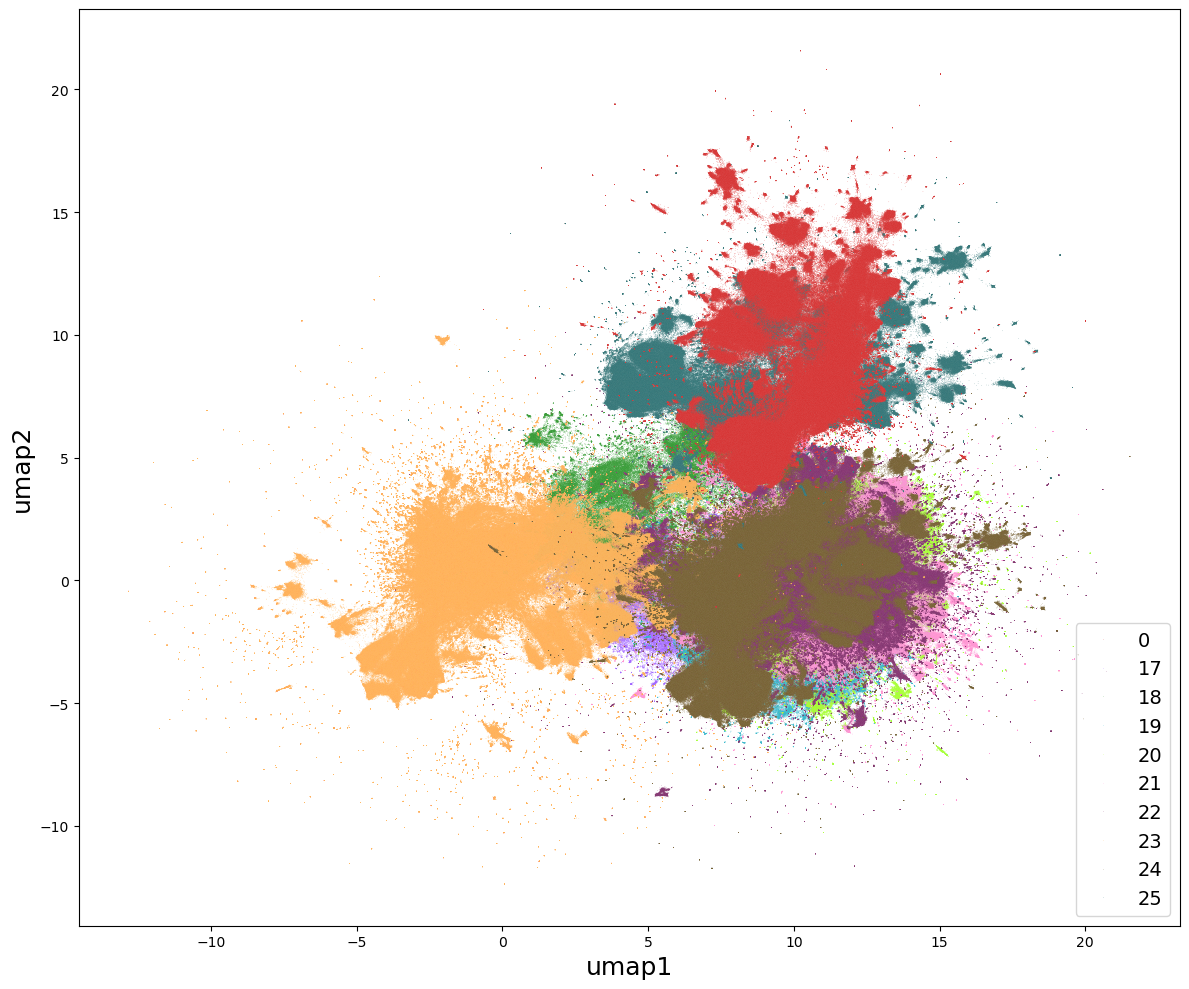

In [80]:
fig = plt.figure(figsize=(12, 10))
palette = sns.color_palette(cc.glasbey, n_colors=25)
ax = sns.scatterplot(data=umap_all,x="X",y="Y",
                     hue=umap_all.group.astype(int), s=0.1,  palette=palette)
ax.set_xlabel('umap1', fontsize=18)
ax.set_ylabel('umap2', fontsize=18)
ax.legend(fontsize=14, facecolor='w', loc=4)
plt.tight_layout()
plt.show()

In [72]:
ax.get_legend_handles_labels()

([], [])

In [65]:
umap_all.to_csv("allCompounds_umap.csv", index=False)

In [41]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist.target = mnist.target.astype(int)

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']